# Credit Card Fraud Detection
clustering and calssification based on European Credit Card transactions dataset.

Library importing

In [1]:
import numpy as np 
import pandas as pd 

Data loading

In [2]:
# kaggle_address='/kaggle/input/creditcardfraud/creditcard.csv'
# df=pd.read_csv(kaggle_address)
df=pd.read_csv('data/creditcard.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


corolation matrix

In [47]:
correlation_mat = df.corr()
print(correlation_mat[np.abs(correlation_mat)>0.3])

            Time   V1        V2        V3   V4        V5   V6        V7   V8  \
Time    1.000000  NaN       NaN -0.419618  NaN       NaN  NaN       NaN  NaN   
V1           NaN  1.0       NaN       NaN  NaN       NaN  NaN       NaN  NaN   
V2           NaN  NaN  1.000000       NaN  NaN       NaN  NaN       NaN  NaN   
V3     -0.419618  NaN       NaN  1.000000  NaN       NaN  NaN       NaN  NaN   
V4           NaN  NaN       NaN       NaN  1.0       NaN  NaN       NaN  NaN   
V5           NaN  NaN       NaN       NaN  NaN  1.000000  NaN       NaN  NaN   
V6           NaN  NaN       NaN       NaN  NaN       NaN  1.0       NaN  NaN   
V7           NaN  NaN       NaN       NaN  NaN       NaN  NaN  1.000000  NaN   
V8           NaN  NaN       NaN       NaN  NaN       NaN  NaN       NaN  1.0   
V9           NaN  NaN       NaN       NaN  NaN       NaN  NaN       NaN  NaN   
V10          NaN  NaN       NaN       NaN  NaN       NaN  NaN       NaN  NaN   
V11          NaN  NaN       NaN       Na

## Preprocess

In [15]:
data=df.to_numpy()
X,y=data[:,1:29],data[:,30]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

## SVM

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [18]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [19]:
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

# Evaluation

KNN

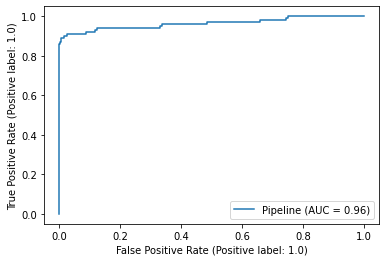

In [20]:
from sklearn.metrics import RocCurveDisplay
knn_disp = RocCurveDisplay.from_estimator(neigh, X_test, y_test)

SVM

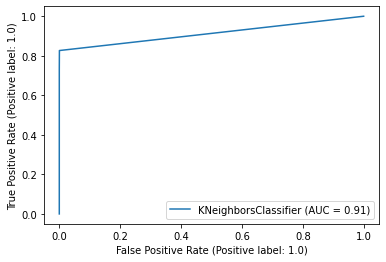

In [21]:
svc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)